In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Deterministic solution function

def Deterministic(step, dt, parameters, initial_state):
    # Calculates the deterministic solution of the model at time steps*dt
    # Inputs the number of time steps covered by the solution, the infinitesimal time dt,
    # the parameters of the model, and the initial state of species
    # Outputs an array of time steps, an array of the solution phi(t=steps*dt), and
    # the deterministic solution function to be used in other computations
    
    # Initialize outputs
    phi0_t = []
    phi1_t = []
    time = [] 
    
    # Model function, with the differential system
    def model(t,y,parameters):
        
        uo = parameters[0]
        ui = parameters[1]
        uo_ = parameters[2]
        ui_ = parameters[3]
        k = parameters[4]
        n = parameters[5]
        M = parameters[6]
        r = parameters[7]
        alpha = parameters[8]

        # Moving parameters:
        k_ = parameters[9]
        n_ = parameters[10]
        
        # Synergy model parameter:
        gamma = parameters[11]
        
        # S
        tau = (1-np.exp(-uo*y[0]))/uo
        tau_ = (1-np.exp(-uo_*y[1]))/uo_
        theta = n*n_*(tau+tau_)**2/4
        tausy = (1+gamma*n*n_*tau*tau_/theta)
        taut_ = (n*tau+n_*tau_)
        taut = taut_*tausy
        S = np.exp(-alpha/taut)

        dttau = np.exp(-uo*y[0])
        dtautaut = alpha*np.exp(-alpha*theta/(taut*(theta+gamma*n*tau*n_*tau_)))*theta*(theta+gamma*n_*tau_*(2*n*tau+n_*tau_))/(taut_**2*(theta+gamma*n*tau*n_*tau_)**2)
        dtS = dttau*dtautaut

        dttau_ = np.exp(-uo_*y[1])
        dtautaut_ = alpha*np.exp(-alpha*theta/(taut*(theta+gamma*n*tau*n_*tau_)))*theta*(theta+gamma*n*tau*(n*tau+2*n_*tau_))/(taut_**2*(theta+gamma*n*tau*n_*tau_)**2)
        dtS_ = dttau_*dtautaut_

        # s
        s = np.exp(-uo*y[0])
        dts = -uo*np.exp(-uo*y[0])

        s_ = np.exp(-uo_*y[1])
        dts_ = -uo_*np.exp(-uo_*y[1])

        # p
        A = n*r*(1-np.exp(-uo*y[0]))*k/k_ - n_*(1-np.exp(-uo_*y[1]))
        ro = r*k*ui/(k_*ui_) + (M*M*A/(2*ui_*ui_))*(A+np.sqrt(A*A+4*ui*ui_*r*k/(M*M*k_))) # +- sqrt

        a = M*n*ro**(1/2)
        a_ = M*n_*ro**(-1/2)
        p = a/(a+ui)
        p_ = a_/(a_+ui_)
        
        ## ASR calculus
        #Li = 1/(a*(1-np.exp(-uo*y[0]))+ui)
        #Lo = a(1+uo*y[0]-np.e(uo*y[0])(1-uo*y[0]))/((ui+a(1-np.exp(uo*y[0])))uo)
        
        #Li_ = 1/(a*(1-np.exp(-uo_*y[1]))+ui_)
        #Lo_ = a(1+uo_*y[1]-np.e(uo_*y[1])(1-uo_*y[1]))/((ui_+a(1-np.exp(uo_*y[1])))uo_)
        
        #ra = r((Li_+Lo_)/k_ + (k_-1)/(k_*ui_))/((Li+Lo)/k + (k-1)/(k*ui))


        # Equations of motion
        dT = dtS/S + p*dts/(1-p*s)
        dT_ = dtS_/S + p_*dts_/(1-p_*s_)

        return[dT,dT_]
    
    # Solution time
    iter_time = [x*dt for x in range(step)]
    
    # Solution object and solve
    J = ode_solver()
    J.function = model
    J.ode_solve(y_0=initial_state, t_span=iter_time, params=parameters)
    sol = J.solution
    
    # Take solutions
    for i in range(len(sol)):
        time.append(sol[i][0])
        phi0_t.append(sol[i][1][0])
        phi1_t.append(sol[i][1][1])
    
    phi_t = [np.array(phi0_t), np.array(phi1_t)]
    
#    x = np.zeros(len(phi_t[0]))
#    for i in range(len(phi_t[0])):
#        if phi_t[0][i] < 0 or phi_t[1][i] < 0:
#            x[i] = 1
#    phi_t[0] = phi_t[0][x.astype('bool')]
#    phi_t[1] = phi_t[1][x.astype('bool')]
    
    return np.array(time), phi_t, J

In [3]:
# Constant parameters:
uo = 0.01
ui = 0.01
uo_ = 0.01
ui_ = 0.01
k = 1
n = 1
M = 1
r = 1
alpha = 0.1

steps = 100

In [4]:
### Solution 1: n_ = 1, k_ = 1

#Moving parameters:
k_ = 1
n_ = 1
gamma = 0

parameters = [uo, ui, uo_, ui_, k, n, M, r, alpha, k_, n_, gamma]

# Initial Values
To = []
for i in range(5):
    for j in range(5):
        To.append([i/10,j/10])
del To[0]



# Capture solutions
solutions = []
for i in range(len(To)):
    time, X, _ = Deterministic(steps, 0.01, parameters, To[i])
    solutions.append([time, X])
    

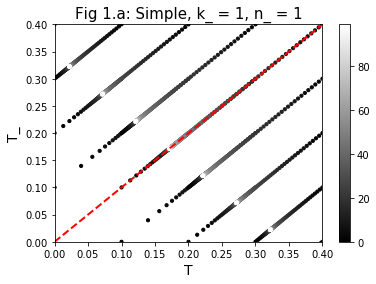

In [5]:
# Plot graphic    
color = np.arange(steps)
for i in range(len(To)):
    plt.scatter(solutions[i][1][0],solutions[i][1][1], c=color, cmap='gray', s=10)
    plt.xlim((0,0.4))
    plt.ylim((0,0.4))
    #plt.plot(T[-1], T_[-1], 'D',c='green',markersize=10)
    #plt.plot(T[0], T_[0], '+',c='green',markersize=20)
plt.plot(np.arange(0,1,0.1),np.arange(0,1,0.1), '--', linewidth=2, c='r')
plt.title('Fig 1.a: Simple, k_ = 1, n_ = 1', fontsize=15)
plt.xlabel('T', fontsize=14)
plt.ylabel('T_', fontsize=14)
plt.colorbar()
plt.savefig('a1.png', dpi=300)

In [25]:
### Solution 2: n_ = 1, k_ = 1.2

# Moving parameters:
k_ = 1.2
n_ = 1
gamma = 0

parameters = [uo, ui, uo_, ui_, k, n, M, r, alpha, k_, n_, gamma]

# Initial Values
To = []
for i in range(5):
    for j in range(5):
        To.append([i/10,j/10])
del To[0]



# Capture solutions
solutions = []
for i in range(len(To)):
    time, X, _ = Deterministic(steps, 0.01, parameters, To[i])
    solutions.append([time, X])

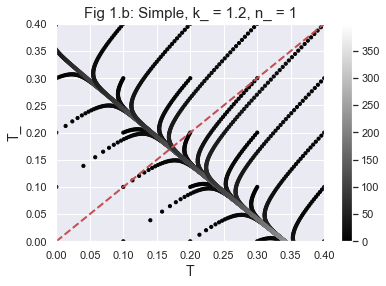

In [27]:
# Plot graphic    
color = np.arange(steps)
for i in range(len(To)):
    plt.scatter(solutions[i][1][0],solutions[i][1][1], c=color, cmap='gray', s=10)
    plt.xlim((0,0.4))
    plt.ylim((0,0.4))
    #plt.plot(T[-1], T_[-1], 'D',c='green',markersize=10)
    #plt.plot(T[0], T_[0], '+',c='green',markersize=20)
plt.plot(np.arange(0,1,0.1),np.arange(0,1,0.1), '--', linewidth=2, c='r')
plt.title('Fig 1.b: Simple, k_ = 1.2, n_ = 1', fontsize=15)
plt.xlabel('T', fontsize=14)
plt.ylabel('T_', fontsize=14)
plt.colorbar()
plt.savefig('a2.png', dpi=300)

In [28]:
### Solution 3: n_ = 1.2, k_ = 1

# Moving parameters:
k_ = 1
n_ = 1.2
gamma = 0

parameters = [uo, ui, uo_, ui_, k, n, M, r, alpha, k_, n_, gamma]

# Initial Values
To = []
for i in range(5):
    for j in range(5):
        To.append([i/10,j/10])
del To[0]



# Capture solutions
solutions = []
for i in range(len(To)):
    time, X, _ = Deterministic(steps, 0.01, parameters, To[i])
    solutions.append([time, X])

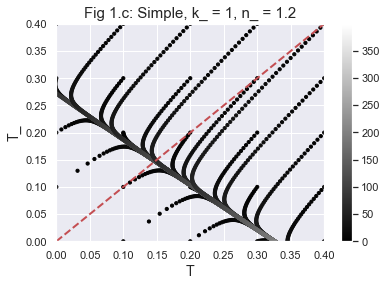

In [29]:
# Plot graphic    
color = np.arange(steps)
for i in range(len(To)):
    plt.scatter(solutions[i][1][0],solutions[i][1][1], c=color, cmap='gray', s=10)
    plt.xlim((0,0.4))
    plt.ylim((0,0.4))
    #plt.plot(T[-1], T_[-1], 'D',c='green',markersize=10)
    #plt.plot(T[0], T_[0], '+',c='green',markersize=20)
plt.plot(np.arange(0,1,0.1),np.arange(0,1,0.1), '--', linewidth=2, c='r')
plt.title('Fig 1.c: Simple, k_ = 1, n_ = 1.2', fontsize=15)
plt.xlabel('T', fontsize=14)
plt.ylabel('T_', fontsize=14)
plt.colorbar()
plt.savefig('a3.png')

In [30]:
### Solution 4: n_ = 1.2, k_ = 1.2

# Moving parameters:
k_ = 1.2
n_ = 1.2
gamma = 0

parameters = [uo, ui, uo_, ui_, k, n, M, r, alpha, k_, n_, gamma]

# Initial Values
To = []
for i in range(5):
    for j in range(5):
        To.append([i/10,j/10])
del To[0]



# Capture solutions
solutions = []
for i in range(len(To)):
    time, X, _ = Deterministic(steps, 0.01, parameters, To[i])
    solutions.append([time, X])

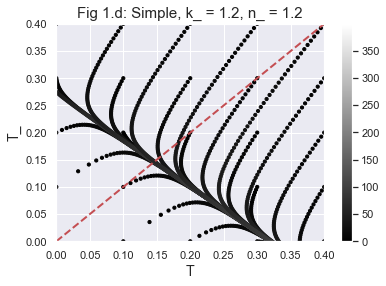

In [31]:
# Plot graphic    
color = np.arange(steps)
for i in range(len(To)):
    plt.scatter(solutions[i][1][0],solutions[i][1][1], c=color, cmap='gray', s=10)
    plt.xlim((0,0.4))
    plt.ylim((0,0.4))
    #plt.plot(T[-1], T_[-1], 'D',c='green',markersize=10)
    #plt.plot(T[0], T_[0], '+',c='green',markersize=20)
plt.plot(np.arange(0,1,0.1),np.arange(0,1,0.1), '--', linewidth=2, c='r')
plt.title('Fig 1.d: Simple, k_ = 1.2, n_ = 1.2', fontsize=15)
plt.xlabel('T', fontsize=14)
plt.ylabel('T_', fontsize=14)
plt.colorbar()
plt.savefig('a4.png', dpi=300)

In [32]:
### Solution 1: n_ = 1, k_ = 1 SYNERGY

#Moving parameters:
k_ = 1
n_ = 1
gamma = 0.1

parameters = [uo, ui, uo_, ui_, k, n, M, r, alpha, k_, n_, gamma]

# Initial Values
To = [[0.025,0],[0,0.025]]
for i in range(5):
    for j in range(5):
        To.append([i/10,j/10])
del To[2]



# Capture solutions
solutions = []
for i in range(len(To)):
    time, X, _ = Deterministic(steps, 0.01, parameters, To[i])
    solutions.append([time, X])
    
 

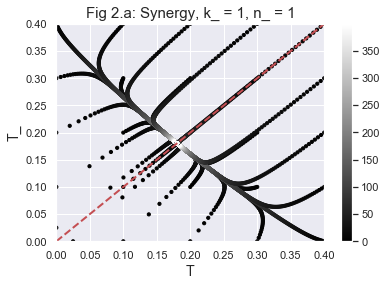

In [33]:
   
# Plot graphic    
color = np.arange(steps)
for i in range(len(To)):
    plt.scatter(solutions[i][1][0],solutions[i][1][1], c=color, cmap='gray', s=10)
    plt.xlim((0,0.4))
    plt.ylim((0,0.4))
    #plt.plot(T[-1], T_[-1], 'D',c='green',markersize=10)
    #plt.plot(T[0], T_[0], '+',c='green',markersize=20)
plt.plot(np.arange(0,1,0.1),np.arange(0,1,0.1), '--', linewidth=2, c='r')
plt.title('Fig 2.a: Synergy, k_ = 1, n_ = 1', fontsize=15)
plt.xlabel('T', fontsize=14)
plt.ylabel('T_', fontsize=14)
plt.colorbar()
plt.savefig('b1.png', dpi=300)

In [34]:
### Solution 2: n_ = 1, k_ = 1.2 SYNERGY

# Moving parameters:
k_ = 1.2
n_ = 1
gamma = 0.1

parameters = [uo, ui, uo_, ui_, k, n, M, r, alpha, k_, n_, gamma]

# Initial Values
To = []
for i in range(5):
    for j in range(5):
        To.append([i/10,j/10])
del To[0]



# Capture solutions
solutions = []
for i in range(len(To)):
    time, X, _ = Deterministic(steps, 0.01, parameters, To[i])
    solutions.append([time, X])

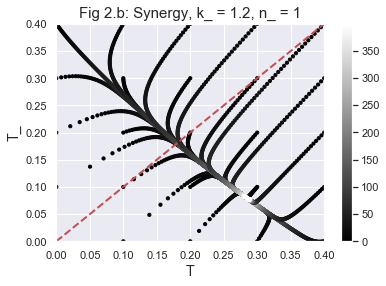

In [35]:
# Plot graphic    
color = np.arange(steps)
for i in range(len(To)):
    plt.scatter(solutions[i][1][0],solutions[i][1][1], c=color, cmap='gray', s=10)
    plt.xlim((0,0.4))
    plt.ylim((0,0.4))
    #plt.plot(T[-1], T_[-1], 'D',c='green',markersize=10)
    #plt.plot(T[0], T_[0], '+',c='green',markersize=20)
plt.plot(np.arange(0,1,0.1),np.arange(0,1,0.1), '--', linewidth=2, c='r')
plt.title('Fig 2.b: Synergy, k_ = 1.2, n_ = 1', fontsize=15)
plt.xlabel('T', fontsize=14)
plt.ylabel('T_', fontsize=14)
plt.colorbar()
plt.savefig('b2.png', dpi=300)

In [36]:
### Solution 3: n_ = 1.2, k_ = 1 SYNERGY

# Moving parameters:
k_ = 1
n_ = 1.2
gamma = 0.1

parameters = [uo, ui, uo_, ui_, k, n, M, r, alpha, k_, n_, gamma]

# Initial Values
To = []
for i in range(5):
    for j in range(5):
        To.append([i/10,j/10])
del To[0]



# Capture solutions
solutions = []
for i in range(len(To)):
    time, X, _ = Deterministic(steps, 0.01, parameters, To[i])
    solutions.append([time, X])

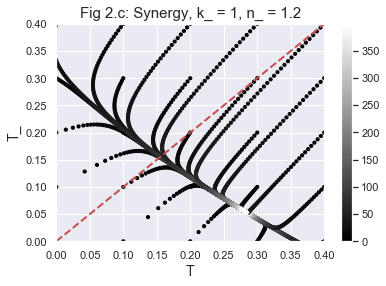

In [37]:
# Plot graphic    
color = np.arange(steps)
for i in range(len(To)):
    plt.scatter(solutions[i][1][0],solutions[i][1][1], c=color, cmap='gray', s=10)
    plt.xlim((0,0.4))
    plt.ylim((0,0.4))
    #plt.plot(T[-1], T_[-1], 'D',c='green',markersize=10)
    #plt.plot(T[0], T_[0], '+',c='green',markersize=20)
plt.plot(np.arange(0,1,0.1),np.arange(0,1,0.1), '--', linewidth=2, c='r')
plt.title('Fig 2.c: Synergy, k_ = 1, n_ = 1.2', fontsize=15)
plt.xlabel('T', fontsize=14)
plt.ylabel('T_', fontsize=14)
plt.colorbar()
plt.savefig('b3.png', dpi=300)

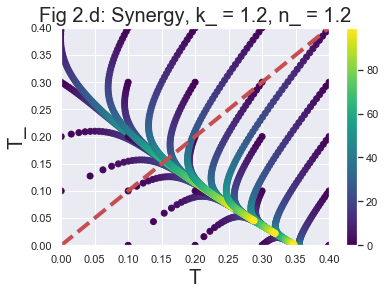

In [12]:
### Solution 4: n_ = 1.2, k_ = 1.2 SYNERGY

# Moving parameters:
k_ = 1.2
n_ = 1.2
gamma = 0.1

parameters = [uo, ui, uo_, ui_, k, n, M, r, alpha, k_, n_, gamma]

# Initial Values
To = []
for i in range(5):
    for j in range(5):
        To.append([i/10,j/10])
del To[0]



# Capture solutions
solutions = []
for i in range(len(To)):
    time, X, _ = Deterministic(steps, 0.01, parameters, To[i])
    solutions.append([time, X])


# Plot graphic    
color = np.arange(steps)
for i in range(len(To)):
    plt.scatter(solutions[i][1][0],solutions[i][1][1], c=color, cmap='viridis')
    plt.xlim((0,0.4))
    plt.ylim((0,0.4))
    #plt.plot(T[-1], T_[-1], 'D',c='green',markersize=10)
    #plt.plot(T[0], T_[0], '+',c='green',markersize=20)
plt.plot(np.arange(0,1,0.1),np.arange(0,1,0.1), '--', linewidth=4, c='r')
plt.title('Fig 2.d: Synergy, k_ = 1.2, n_ = 1.2', fontsize=20)
plt.xlabel('T', fontsize=20)
plt.ylabel('T_', fontsize=20)
plt.colorbar()
plt.savefig('b4.png')

In [3]:
# Constant parameters:
uo = 0.01
ui = 0.01
uo_ = 0.01
ui_ = 0.01
k = 1
n = 1
M = 1
r = 1
alpha = 0.1

steps = 100

In [16]:
# Figure 3a

#knob = [0.5,0.75,1.,1.25,1.5,1.75,2.]
knob = [0.1,0.5,0.75,1.,1.25,1.5,1.75,2.,2.25,2.5,2.75,3.,3.25,3.5,3.75,4.]

asr1 = []
prop1 = []
male1 = []
female1 = []

asr2 = []
prop2 = []
male2 = []
female2 = []

asr3 = []
prop3 = []
male3 = []
female3 = []

#-----------------------------------------------------------------------------------------------------
# Continuous line

for r in knob:
    
    # Constant parameters:
    uo = 0.01
    ui = 0.01
    uo_ = 0.01
    ui_ = 0.01
    k = 1
    n = 1
    M = 1
    alpha = 0.1

    steps = 400

    # Moving parameters:
    k_ = 1
    n_ = 1
    gamma = 0.1
    
    parameters = [uo, ui, uo_, ui_, k, n, M, r, alpha, k_, n_, gamma]
    
    time, X, _ = Deterministic(steps, 0.01, parameters, [0.4,0.3])

    i = 0
    while True:
        if i >= len(X[0]):
            break
        if X[0][i] < 0 or X[1][i] < 0:
            X[0] = np.delete(X[0],np.s_[i:])
            X[1] = np.delete(X[1],np.s_[i:])
        i += 1
    
    T = X[0][-1]
    T_ = X[1][-1]
    
    
    A = n*r*(1-np.exp(-uo*T))*k/k_ - n_*(1-np.exp(-uo_*T_))
    ro = r*k*ui/(k_*ui_) + (M*M*A/(2*ui_*ui_))*(A+np.sqrt(A*A+4*ui*ui_*r*k/(M*M*k_))) # +- sqrt

    a = M*n*ro**(1/2)
    a_ = M*n_*ro**(-1/2)

    Li = 1/(a*(1-np.exp(-uo*T))+ui)
    Lo = a*(1+uo*T-np.exp(uo*T)*(1-uo*T))/((ui+a*(1-np.exp(uo*T)))*uo)

    Li_ = 1/(a*(1-np.exp(-uo_*T_))+ui_)
    Lo_ = a*(1+uo_*T_-np.exp(uo_*T_)*(1-uo_*T_))/((ui_+a*(1-np.exp(uo_*T_)))*uo_)

    ra = r*((Li_+Lo_)/k_ + (k_-1)/(k_*ui_))/((Li+Lo)/k + (k-1)/(k*ui))
    
    pT_ = T_/(T+T_)
    
    asr1.append(ra)
    prop1.append(pT_)
    male1.append(T_)
    female1.append(T)
    
asr1 = np.array(asr1)
prop1 = np.array(prop1)
male1 = np.array(male1)
female1 = np.array(female1)

#-----------------------------------------------------------------------------------------------------
# Dashed line

for r in knob:
    
    # Constant parameters:
    uo = 0.01
    ui = 0.01
    uo_ = 0.01
    ui_ = 0.01
    k = 1
    n = 1
    M = 1
    alpha = 0.1

    steps = 400

    # Moving parameters:
    k_ = 1
    n_ = 1.2
    gamma = 0.1
    
    parameters = [uo, ui, uo_, ui_, k, n, M, r, alpha, k_, n_, gamma]
    
    time, X, _ = Deterministic(steps, 0.01, parameters, [0.4,0.3])
    
    i = 0
    while True:
        if i >= len(X[0]):
            break
        if X[0][i] < 0 or X[1][i] < 0:
            X[0] = np.delete(X[0],np.s_[i:])
            X[1] = np.delete(X[1],np.s_[i:])
        i += 1
    
    
    T = X[0][-1]
    T_ = X[1][-1]

    
    A = n*r*(1-np.exp(-uo*T))*k/k_ - n_*(1-np.exp(-uo_*T_))
    ro = r*k*ui/(k_*ui_) + (M*M*A/(2*ui_*ui_))*(A+np.sqrt(A*A+4*ui*ui_*r*k/(M*M*k_))) # +- sqrt

    a = M*n*ro**(1/2)
    a_ = M*n_*ro**(-1/2)

    Li = 1/(a*(1-np.exp(-uo*T))+ui)
    Lo = a*(1+uo*T-np.exp(uo*T)*(1-uo*T))/((ui+a*(1-np.exp(uo*T)))*uo)

    Li_ = 1/(a*(1-np.exp(-uo_*T_))+ui_)
    Lo_ = a*(1+uo_*T_-np.exp(uo_*T_)*(1-uo_*T_))/((ui_+a*(1-np.exp(uo_*T_)))*uo_)

    ra = r*((Li_+Lo_)/k_ + (k_-1)/(k_*ui_))/((Li+Lo)/k + (k-1)/(k*ui))
    
    pT_ = T_/(T+T_)
    
    asr2.append(ra)
    prop2.append(pT_)
    male2.append(T_)
    female2.append(T)
    
asr2 = np.array(asr2)
prop2 = np.array(prop2)
male2 = np.array(male2)
female2 = np.array(female2)

#-----------------------------------------------------------------------------------------------------
# Dotted line

for r in knob:
    
    # Constant parameters:
    uo = 0.01
    ui = 0.01
    uo_ = 0.01
    ui_ = 0.01
    k = 1
    n = 1
    M = 1
    alpha = 0.1

    steps = 400

    # Moving parameters:
    k_ = 1.2
    n_ = 1.2
    gamma = 0.1
    
    parameters = [uo, ui, uo_, ui_, k, n, M, r, alpha, k_, n_, gamma]
    
    time, X, _ = Deterministic(steps, 0.01, parameters, [0.4,0.3])
    
    i = 0
    while True:
        if i >= len(X[0]):
            break
        if X[0][i] < 0 or X[1][i] < 0:
            X[0] = np.delete(X[0],np.s_[i:])
            X[1] = np.delete(X[1],np.s_[i:])
        i += 1
    
    T = X[0][-1]
    T_ = X[1][-1]
    
    if T < 0:
        T = 0.
    if T_ < 0:
        T_ = 0.
    
    A = n*r*(1-np.exp(-uo*T))*k/k_ - n_*(1-np.exp(-uo_*T_))
    ro = r*k*ui/(k_*ui_) + (M*M*A/(2*ui_*ui_))*(A+np.sqrt(A*A+4*ui*ui_*r*k/(M*M*k_))) # +- sqrt

    a = M*n*ro**(1/2)
    a_ = M*n_*ro**(-1/2)

    Li = 1/(a*(1-np.exp(-uo*T))+ui)
    Lo = a*(1+uo*T-np.exp(uo*T)*(1-uo*T))/((ui+a*(1-np.exp(uo*T)))*uo)

    Li_ = 1/(a*(1-np.exp(-uo_*T_))+ui_)
    Lo_ = a*(1+uo_*T_-np.exp(uo_*T_)*(1-uo_*T_))/((ui_+a*(1-np.exp(uo_*T_)))*uo_)

    ra = r*((Li_+Lo_)/k_ + (k_-1)/(k_*ui_))/((Li+Lo)/k + (k-1)/(k*ui))
    
    pT_ = T_/(T+T_)
    
    asr3.append(ra)
    prop3.append(pT_)
    male3.append(T_)
    female3.append(T)
    
asr3 = np.array(asr3)
prop3 = np.array(prop3)
male3 = np.array(male3)
female3 = np.array(female3)


/home/gui/anaconda3/envs/sage/lib/python3.7/site-packages/sage/repl/ipython_kernel/__main__.py:36: RuntimeWarning: overflow encountered in exp
/home/gui/anaconda3/envs/sage/lib/python3.7/site-packages/sage/repl/ipython_kernel/__main__.py:37: RuntimeWarning: overflow encountered in exp
/home/gui/anaconda3/envs/sage/lib/python3.7/site-packages/sage/repl/ipython_kernel/__main__.py:39: RuntimeWarning: invalid value encountered in double_scalars
/home/gui/anaconda3/envs/sage/lib/python3.7/site-packages/sage/repl/ipython_kernel/__main__.py:44: RuntimeWarning: overflow encountered in exp
/home/gui/anaconda3/envs/sage/lib/python3.7/site-packages/sage/repl/ipython_kernel/__main__.py:48: RuntimeWarning: overflow encountered in exp
/home/gui/anaconda3/envs/sage/lib/python3.7/site-packages/sage/repl/ipython_kernel/__main__.py:53: RuntimeWarning: overflow encountered in exp
/home/gui/anaconda3/envs/sage/lib/python3.7/site-packages/sage/repl/ipython_kernel/__main__.py:54: RuntimeWarning: overflow en

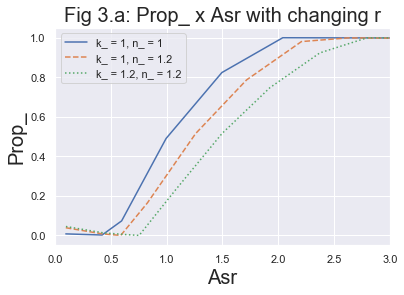

In [17]:
# Plot 3a

p1 = plt.plot(asr1, prop1)
p2 = plt.plot(asr2, prop2, linestyle = '--')
p3 = plt.plot(asr3, prop3, linestyle = ':')
plt.xlim(0,3)
plt.title('Fig 3.a: Prop_ x Asr with changing r', fontsize=20)
plt.xlabel('Asr', fontsize=20)
plt.ylabel('Prop_', fontsize=20)
plt.legend((p1[0], p2[0], p3[0]), ('k_ = 1, n_ = 1', 'k_ = 1, n_ = 1.2', 'k_ = 1.2, n_ = 1.2'))
plt.savefig('3a.png')
plt.show()

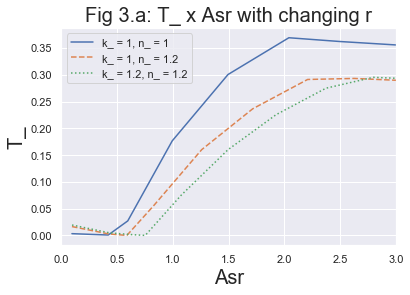

In [18]:
# Plot 3a MALE

p1 = plt.plot(asr1, male1)
p2 = plt.plot(asr2, male2, linestyle = '--')
p3 = plt.plot(asr3, male3, linestyle = ':')
plt.xlim(0,3)
plt.title('Fig 3.a: T_ x Asr with changing r', fontsize=20)
plt.xlabel('Asr', fontsize=20)
plt.ylabel('T_', fontsize=20)
plt.legend((p1[0], p2[0], p3[0]), ('k_ = 1, n_ = 1', 'k_ = 1, n_ = 1.2', 'k_ = 1.2, n_ = 1.2'))
plt.savefig('3aM.png')
plt.show()

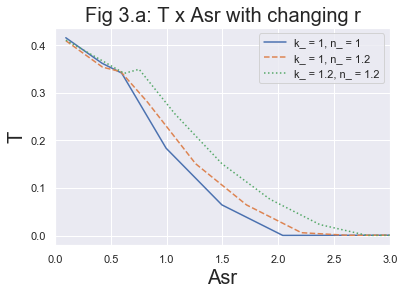

In [19]:
# Plot 3a FEMALE

p1 = plt.plot(asr1, female1)
p2 = plt.plot(asr2, female2, linestyle = '--')
p3 = plt.plot(asr3, female3, linestyle = ':')
plt.xlim(0,3)
plt.title('Fig 3.a: T x Asr with changing r', fontsize=20)
plt.xlabel('Asr', fontsize=20)
plt.ylabel('T', fontsize=20)
plt.legend((p1[0], p2[0], p3[0]), ('k_ = 1, n_ = 1', 'k_ = 1, n_ = 1.2', 'k_ = 1.2, n_ = 1.2'))
plt.savefig('3aF.png')
plt.show()

In [20]:
# Figure 3uu

#knob = [0.01,0.04,0.07,0.10,0.13,0.16,0.19,0.22,0.25,0.28,0.31,0.34]
knob = [0.0025,0.005,0.0075,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08]

asr1 = []
prop1 = []
male1 = []
female1 = []

asr2 = []
prop2 = []
male2 = []
female2 = []

asr3 = []
prop3 = []
male3 = []
female3 = []

#-----------------------------------------------------------------------------------------------------
# Continuous line

for u in knob:
    
    # Constant parameters:
    uo = 0.01
    ui = 0.01
    uo_ = u
    ui_ = u
    r = 1
    k = 1
    n = 1
    M = 1
    alpha = 0.1

    steps = 400

    # Moving parameters:
    k_ = 1
    n_ = 1
    gamma = 0.1
    
    parameters = [uo, ui, uo_, ui_, k, n, M, r, alpha, k_, n_, gamma]
    
    time, X, _ = Deterministic(steps, 0.01, parameters, [0.4,0.3])
    
    i = 0
    while True:
        if i >= len(X[0]):
            break
        if X[0][i] < 0 or X[1][i] < 0:
            X[0] = np.delete(X[0],np.s_[i:])
            X[1] = np.delete(X[1],np.s_[i:])
        i += 1
    
    T = X[0][-1]
    T_ = X[1][-1]
    
    A = n*r*(1-np.exp(-uo*T))*k/k_ - n_*(1-np.exp(-uo_*T_))
    ro = r*k*ui/(k_*ui_) + (M*M*A/(2*ui_*ui_))*(A+np.sqrt(A*A+4*ui*ui_*r*k/(M*M*k_))) # +- sqrt

    a = M*n*ro**(1/2)
    a_ = M*n_*ro**(-1/2)

    Li = 1/(a*(1-np.exp(-uo*T))+ui)
    Lo = a*(1+uo*T-np.exp(uo*T)*(1-uo*T))/((ui+a*(1-np.exp(uo*T)))*uo)

    Li_ = 1/(a*(1-np.exp(-uo_*T_))+ui_)
    Lo_ = a*(1+uo_*T_-np.exp(uo_*T_)*(1-uo_*T_))/((ui_+a*(1-np.exp(uo_*T_)))*uo_)

    ra = r*((Li_+Lo_)/k_ + (k_-1)/(k_*ui_))/((Li+Lo)/k + (k-1)/(k*ui))
    
    pT_ = T_/(T+T_)
    
    asr1.append(ra)
    prop1.append(pT_)
    male1.append(T_)
    female1.append(T)
    
asr1 = np.array(asr1)
prop1 = np.array(prop1)
male1 = np.array(male1)
female1 = np.array(female1)

#-----------------------------------------------------------------------------------------------------
# Dashed line

for u in knob:
    
    # Constant parameters:
    uo = 0.01
    ui = 0.01
    uo_ = u
    ui_ = u
    r = 1
    k = 1
    n = 1
    M = 1
    alpha = 0.1

    steps = 400

    # Moving parameters:
    k_ = 1
    n_ = 1.2
    gamma = 0.1
    
    parameters = [uo, ui, uo_, ui_, k, n, M, r, alpha, k_, n_, gamma]
    
    time, X, _ = Deterministic(steps, 0.01, parameters, [0.4,0.3])
    
    i = 0
    while True:
        if i >= len(X[0]):
            break
        if X[0][i] < 0 or X[1][i] < 0:
            X[0] = np.delete(X[0],np.s_[i:])
            X[1] = np.delete(X[1],np.s_[i:])
        i += 1
    
    T = X[0][-1]
    T_ = X[1][-1]
    
    A = n*r*(1-np.exp(-uo*T))*k/k_ - n_*(1-np.exp(-uo_*T_))
    ro = r*k*ui/(k_*ui_) + (M*M*A/(2*ui_*ui_))*(A+np.sqrt(A*A+4*ui*ui_*r*k/(M*M*k_))) # +- sqrt

    a = M*n*ro**(1/2)
    a_ = M*n_*ro**(-1/2)

    Li = 1/(a*(1-np.exp(-uo*T))+ui)
    Lo = a*(1+uo*T-np.exp(uo*T)*(1-uo*T))/((ui+a*(1-np.exp(uo*T)))*uo)

    Li_ = 1/(a*(1-np.exp(-uo_*T_))+ui_)
    Lo_ = a*(1+uo_*T_-np.exp(uo_*T_)*(1-uo_*T_))/((ui_+a*(1-np.exp(uo_*T_)))*uo_)

    ra = r*((Li_+Lo_)/k_ + (k_-1)/(k_*ui_))/((Li+Lo)/k + (k-1)/(k*ui))
    
    pT_ = T_/(T+T_)
    
    asr2.append(ra)
    prop2.append(pT_)
    male2.append(T_)
    female2.append(T)
    
asr2 = np.array(asr2)
prop2 = np.array(prop2)
male2 = np.array(male2)
female2 = np.array(female2)

#-----------------------------------------------------------------------------------------------------
# Dotted line

for u in knob:
    
    # Constant parameters:
    uo = 0.01
    ui = 0.01
    uo_ = u
    ui_ = u
    r = 1
    k = 1
    n = 1
    M = 1
    alpha = 0.1

    steps = 400

    # Moving parameters:
    k_ = 1.2
    n_ = 1.2
    gamma = 0.1
    
    parameters = [uo, ui, uo_, ui_, k, n, M, r, alpha, k_, n_, gamma]
    
    time, X, _ = Deterministic(steps, 0.01, parameters, [0.4,0.3])
    
    i = 0
    while True:
        if i >= len(X[0]):
            break
        if X[0][i] < 0 or X[1][i] < 0:
            X[0] = np.delete(X[0],np.s_[i:])
            X[1] = np.delete(X[1],np.s_[i:])
        i += 1
    
    T = X[0][-1]
    T_ = X[1][-1]
    
    A = n*r*(1-np.exp(-uo*T))*k/k_ - n_*(1-np.exp(-uo_*T_))
    ro = r*k*ui/(k_*ui_) + (M*M*A/(2*ui_*ui_))*(A+np.sqrt(A*A+4*ui*ui_*r*k/(M*M*k_))) # +- sqrt

    a = M*n*ro**(1/2)
    a_ = M*n_*ro**(-1/2)

    Li = 1/(a*(1-np.exp(-uo*T))+ui)
    Lo = a*(1+uo*T-np.exp(uo*T)*(1-uo*T))/((ui+a*(1-np.exp(uo*T)))*uo)

    Li_ = 1/(a*(1-np.exp(-uo_*T_))+ui_)
    Lo_ = a*(1+uo_*T_-np.exp(uo_*T_)*(1-uo_*T_))/((ui_+a*(1-np.exp(uo_*T_)))*uo_)

    ra = r*((Li_+Lo_)/k_ + (k_-1)/(k_*ui_))/((Li+Lo)/k + (k-1)/(k*ui))
    
    pT_ = T_/(T+T_)
    
    asr3.append(ra)
    prop3.append(pT_)
    male3.append(T_)
    female3.append(T)
    
asr3 = np.array(asr3)
prop3 = np.array(prop3)
male3 = np.array(male3)
female3 = np.array(female3)


/home/gui/anaconda3/envs/sage/lib/python3.7/site-packages/sage/repl/ipython_kernel/__main__.py:36: RuntimeWarning: overflow encountered in exp
/home/gui/anaconda3/envs/sage/lib/python3.7/site-packages/sage/repl/ipython_kernel/__main__.py:39: RuntimeWarning: invalid value encountered in double_scalars
/home/gui/anaconda3/envs/sage/lib/python3.7/site-packages/sage/repl/ipython_kernel/__main__.py:44: RuntimeWarning: overflow encountered in exp
/home/gui/anaconda3/envs/sage/lib/python3.7/site-packages/sage/repl/ipython_kernel/__main__.py:45: RuntimeWarning: invalid value encountered in double_scalars
/home/gui/anaconda3/envs/sage/lib/python3.7/site-packages/sage/repl/ipython_kernel/__main__.py:49: RuntimeWarning: invalid value encountered in double_scalars
/home/gui/anaconda3/envs/sage/lib/python3.7/site-packages/sage/repl/ipython_kernel/__main__.py:53: RuntimeWarning: overflow encountered in exp
/home/gui/anaconda3/envs/sage/lib/python3.7/site-packages/sage/repl/ipython_kernel/__main__.py

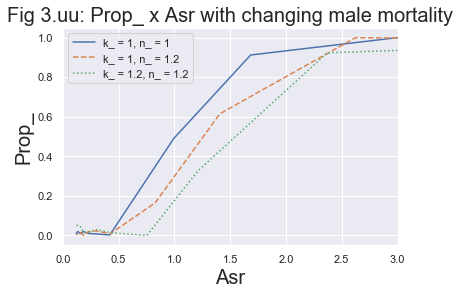

In [22]:
# Plot 3uu

p1 = plt.plot(asr1, prop1)
p2 = plt.plot(asr2, prop2, linestyle = '--')
p3 = plt.plot(asr3, prop3, linestyle = ':')
plt.xlim(0,3)
plt.title('Fig 3.uu: Prop_ x Asr with changing male mortality', fontsize=20)
plt.xlabel('Asr', fontsize=20)
plt.ylabel('Prop_', fontsize=20)
plt.legend((p1[0], p2[0], p3[0]), ('k_ = 1, n_ = 1', 'k_ = 1, n_ = 1.2', 'k_ = 1.2, n_ = 1.2'))
plt.savefig('3uu.png')
plt.show()

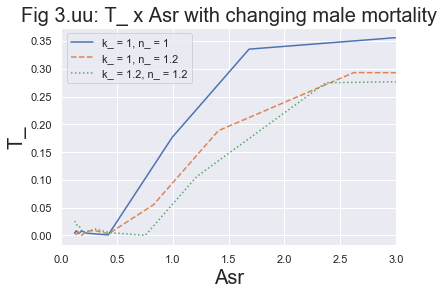

In [23]:
# Plot 3uu MALE

p1 = plt.plot(asr1, male1)
p2 = plt.plot(asr2, male2, linestyle = '--')
p3 = plt.plot(asr3, male3, linestyle = ':')
plt.xlim(0,3)
plt.title('Fig 3.uu: T_ x Asr with changing male mortality', fontsize=20)
plt.xlabel('Asr', fontsize=20)
plt.ylabel('T_', fontsize=20)
plt.legend((p1[0], p2[0], p3[0]), ('k_ = 1, n_ = 1', 'k_ = 1, n_ = 1.2', 'k_ = 1.2, n_ = 1.2'))
plt.savefig('3uuM.png')
plt.show()

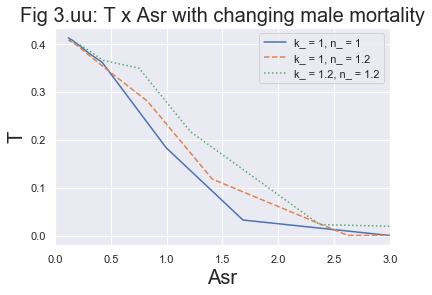

In [24]:
# Plot 3uu FEMALE

p1 = plt.plot(asr1, female1)
p2 = plt.plot(asr2, female2, linestyle = '--')
p3 = plt.plot(asr3, female3, linestyle = ':')
plt.xlim(0,3)
plt.title('Fig 3.uu: T x Asr with changing male mortality', fontsize=20)
plt.xlabel('Asr', fontsize=20)
plt.ylabel('T', fontsize=20)
plt.legend((p1[0], p2[0], p3[0]), ('k_ = 1, n_ = 1', 'k_ = 1, n_ = 1.2', 'k_ = 1.2, n_ = 1.2'))
plt.savefig('3uuF.png')
plt.show()

In [8]:
# Figure 3b

#knob = [0.01,0.04,0.07,0.10,0.13,0.16,0.19,0.22,0.25,0.28,0.31,0.34]
knob = [0.0025,0.005,0.0075,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08]

asr1 = []
prop1 = []
male1 = []
female1 = []

asr2 = []
prop2 = []
male2 = []
female2 = []

asr3 = []
prop3 = []
male3 = []
female3 = []

#-----------------------------------------------------------------------------------------------------
# Continuous line

for u in knob:
    
    # Constant parameters:
    uo = 0.01
    ui = 0.01
    uo_ = 0.01
    ui_ = u
    r = 1
    k = 1
    n = 1
    M = 1
    alpha = 0.1

    steps = 400

    # Moving parameters:
    k_ = 1
    n_ = 1
    gamma = 0.1
    
    parameters = [uo, ui, uo_, ui_, k, n, M, r, alpha, k_, n_, gamma]
    
    time, X, _ = Deterministic(steps, 0.01, parameters, [0.4,0.3])
    
    i = 0
    while True:
        if i >= len(X[0]):
            break
        if X[0][i] < 0 or X[1][i] < 0:
            X[0] = np.delete(X[0],np.s_[i:])
            X[1] = np.delete(X[1],np.s_[i:])
        i += 1
    
    T = X[0][-1]
    T_ = X[1][-1]
    
    A = n*r*(1-np.exp(-uo*T))*k/k_ - n_*(1-np.exp(-uo_*T_))
    ro = r*k*ui/(k_*ui_) + (M*M*A/(2*ui_*ui_))*(A+np.sqrt(A*A+4*ui*ui_*r*k/(M*M*k_))) # +- sqrt

    a = M*n*ro**(1/2)
    a_ = M*n_*ro**(-1/2)

    Li = 1/(a*(1-np.exp(-uo*T))+ui)
    Lo = a*(1+uo*T-np.exp(uo*T)*(1-uo*T))/((ui+a*(1-np.exp(uo*T)))*uo)

    Li_ = 1/(a*(1-np.exp(-uo_*T_))+ui_)
    Lo_ = a*(1+uo_*T_-np.exp(uo_*T_)*(1-uo_*T_))/((ui_+a*(1-np.exp(uo_*T_)))*uo_)

    ra = r*((Li_+Lo_)/k_ + (k_-1)/(k_*ui_))/((Li+Lo)/k + (k-1)/(k*ui))
    
    pT_ = T_/(T+T_)
    
    asr1.append(ra)
    prop1.append(pT_)
    male1.append(T_)
    female1.append(T)
    
asr1 = np.array(asr1)
prop1 = np.array(prop1)
male1 = np.array(male1)
female1 = np.array(female1)

#-----------------------------------------------------------------------------------------------------
# Dashed line

for u in knob:
    
    # Constant parameters:
    uo = 0.01
    ui = 0.01
    uo_ = 0.01
    ui_ = u
    r = 1
    k = 1
    n = 1
    M = 1
    alpha = 0.1

    steps = 400

    # Moving parameters:
    k_ = 1
    n_ = 1.2
    gamma = 0.1
    
    parameters = [uo, ui, uo_, ui_, k, n, M, r, alpha, k_, n_, gamma]
    
    time, X, _ = Deterministic(steps, 0.01, parameters, [0.4,0.3])
    
    i = 0
    while True:
        if i >= len(X[0]):
            break
        if X[0][i] < 0 or X[1][i] < 0:
            X[0] = np.delete(X[0],np.s_[i:])
            X[1] = np.delete(X[1],np.s_[i:])
        i += 1
    
    T = X[0][-1]
    T_ = X[1][-1]
    
    A = n*r*(1-np.exp(-uo*T))*k/k_ - n_*(1-np.exp(-uo_*T_))
    ro = r*k*ui/(k_*ui_) + (M*M*A/(2*ui_*ui_))*(A+np.sqrt(A*A+4*ui*ui_*r*k/(M*M*k_))) # +- sqrt

    a = M*n*ro**(1/2)
    a_ = M*n_*ro**(-1/2)

    Li = 1/(a*(1-np.exp(-uo*T))+ui)
    Lo = a*(1+uo*T-np.exp(uo*T)*(1-uo*T))/((ui+a*(1-np.exp(uo*T)))*uo)

    Li_ = 1/(a*(1-np.exp(-uo_*T_))+ui_)
    Lo_ = a*(1+uo_*T_-np.exp(uo_*T_)*(1-uo_*T_))/((ui_+a*(1-np.exp(uo_*T_)))*uo_)

    ra = r*((Li_+Lo_)/k_ + (k_-1)/(k_*ui_))/((Li+Lo)/k + (k-1)/(k*ui))
    
    pT_ = T_/(T+T_)
    
    asr2.append(ra)
    prop2.append(pT_)
    male2.append(T_)
    female2.append(T)
    
asr2 = np.array(asr2)
prop2 = np.array(prop2)
male2 = np.array(male2)
female2 = np.array(female2)

#-----------------------------------------------------------------------------------------------------
# Dotted line

for u in knob:
    
    # Constant parameters:
    uo = 0.01
    ui = 0.01
    uo_ = 0.01
    ui_ = u
    r = 1
    k = 1
    n = 1
    M = 1
    alpha = 0.1

    steps = 400

    # Moving parameters:
    k_ = 1.2
    n_ = 1.2
    gamma = 0.1
    
    parameters = [uo, ui, uo_, ui_, k, n, M, r, alpha, k_, n_, gamma]
    
    time, X, _ = Deterministic(steps, 0.01, parameters, [0.4,0.3])
    
    i = 0
    while True:
        if i >= len(X[0]):
            break
        if X[0][i] < 0 or X[1][i] < 0:
            X[0] = np.delete(X[0],np.s_[i:])
            X[1] = np.delete(X[1],np.s_[i:])
        i += 1
    
    T = X[0][-1]
    T_ = X[1][-1]
    
    A = n*r*(1-np.exp(-uo*T))*k/k_ - n_*(1-np.exp(-uo_*T_))
    ro = r*k*ui/(k_*ui_) + (M*M*A/(2*ui_*ui_))*(A+np.sqrt(A*A+4*ui*ui_*r*k/(M*M*k_))) # +- sqrt

    a = M*n*ro**(1/2)
    a_ = M*n_*ro**(-1/2)

    Li = 1/(a*(1-np.exp(-uo*T))+ui)
    Lo = a*(1+uo*T-np.exp(uo*T)*(1-uo*T))/((ui+a*(1-np.exp(uo*T)))*uo)

    Li_ = 1/(a*(1-np.exp(-uo_*T_))+ui_)
    Lo_ = a*(1+uo_*T_-np.exp(uo_*T_)*(1-uo_*T_))/((ui_+a*(1-np.exp(uo_*T_)))*uo_)

    ra = r*((Li_+Lo_)/k_ + (k_-1)/(k_*ui_))/((Li+Lo)/k + (k-1)/(k*ui))
    
    pT_ = T_/(T+T_)
    
    asr3.append(ra)
    prop3.append(pT_)
    male3.append(T_)
    female3.append(T)
    
asr3 = np.array(asr3)
prop3 = np.array(prop3)
male3 = np.array(male3)
female3 = np.array(female3)


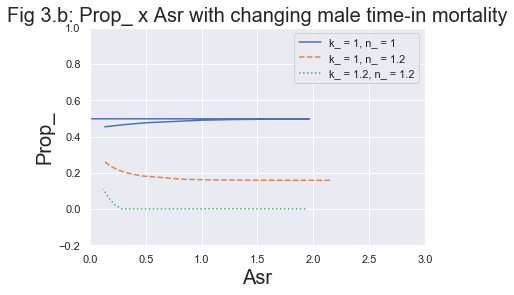

In [13]:
# Plot 3b

p1 = plt.plot(asr1, prop1)
p2 = plt.plot(asr2, prop2, linestyle = '--')
p3 = plt.plot(asr3, prop3, linestyle = ':')
plt.xlim(0,3)
plt.ylim(-0.2,1)
plt.title('Fig 3.b: Prop_ x Asr with changing male time-in mortality', fontsize=20)
plt.xlabel('Asr', fontsize=20)
plt.ylabel('Prop_', fontsize=20)
plt.legend((p1[0], p2[0], p3[0]), ('k_ = 1, n_ = 1', 'k_ = 1, n_ = 1.2', 'k_ = 1.2, n_ = 1.2'))
plt.savefig('3b.png')
plt.show()

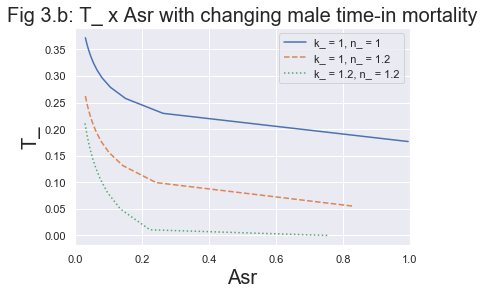

In [35]:
# Plot 3b - MALE

p1 = plt.plot(asr1, male1)
p2 = plt.plot(asr2, male2, linestyle = '--')
p3 = plt.plot(asr3, male3, linestyle = ':')
plt.xlim(0,1)
plt.title('Fig 3.b: T_ x Asr with changing male time-in mortality', fontsize=20)
plt.xlabel('Asr', fontsize=20)
plt.ylabel('T_', fontsize=20)
plt.legend((p1[0], p2[0], p3[0]), ('k_ = 1, n_ = 1', 'k_ = 1, n_ = 1.2', 'k_ = 1.2, n_ = 1.2'))
plt.savefig('3bM.png')
plt.show()

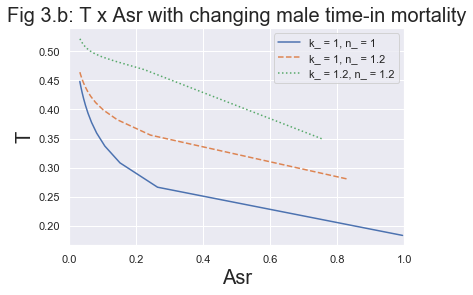

In [36]:
# Plot 3b - FEMALE

p1 = plt.plot(asr1, female1)
p2 = plt.plot(asr2, female2, linestyle = '--')
p3 = plt.plot(asr3, female3, linestyle = ':')
plt.xlim(0,1)
plt.title('Fig 3.b: T x Asr with changing male time-in mortality', fontsize=20)
plt.xlabel('Asr', fontsize=20)
plt.ylabel('T', fontsize=20)
plt.legend((p1[0], p2[0], p3[0]), ('k_ = 1, n_ = 1', 'k_ = 1, n_ = 1.2', 'k_ = 1.2, n_ = 1.2'))
plt.savefig('3bF.png')
plt.show()

In [34]:
# Figure 3c

#knob = [0.5,0.75,1.,1.25,1.5,1.75,2.]
knob = [0.1,0.5,0.75,1.,1.25,1.5,1.75,2.,2.25,2.5,2.75,3.,3.25,3.5,3.75,4.]

asr1 = []
osr1 = []

asr2 = []
osr2 = []

asr3 = []
osr3 = []

#-----------------------------------------------------------------------------------------------------
# Continuous line

for r in knob:
    
    # Constant parameters:
    uo = 0.01
    ui = 0.01
    uo_ = 0.01
    ui_ = 0.01
    k = 1
    n = 1
    M = 1
    alpha = 0.1

    steps = 400

    # Moving parameters:
    k_ = 1
    n_ = 1
    gamma = 0.1
    
    parameters = [uo, ui, uo_, ui_, k, n, M, r, alpha, k_, n_, gamma]
    
    time, X, _ = Deterministic(steps, 0.01, parameters, [0.4,0.3])
    
    i = 0
    while True:
        if i >= len(X[0]):
            break
        if X[0][i] < 0 or X[1][i] < 0:
            X[0] = np.delete(X[0],np.s_[i:])
            X[1] = np.delete(X[1],np.s_[i:])
        i += 1
    
    T = X[0][-1]
    T_ = X[1][-1]
    
    A = n*r*(1-np.exp(-uo*T))*k/k_ - n_*(1-np.exp(-uo_*T_))
    ro = r*k*ui/(k_*ui_) + (M*M*A/(2*ui_*ui_))*(A+np.sqrt(A*A+4*ui*ui_*r*k/(M*M*k_))) # +- sqrt

    a = M*n*ro**(1/2)
    a_ = M*n_*ro**(-1/2)

    Li = 1/(a*(1-np.exp(-uo*T))+ui)
    Lo = a*(1+uo*T-np.exp(uo*T)*(1-uo*T))/((ui+a*(1-np.exp(uo*T)))*uo)

    Li_ = 1/(a*(1-np.exp(-uo_*T_))+ui_)
    Lo_ = a*(1+uo_*T_-np.exp(uo_*T_)*(1-uo_*T_))/((ui_+a*(1-np.exp(uo_*T_)))*uo_)

    ra = r*((Li_+Lo_)/k_ + (k_-1)/(k_*ui_))/((Li+Lo)/k + (k-1)/(k*ui))
    
    
    asr1.append(ra)
    osr1.append(ro)
    
asr1 = np.array(asr1)
osr1 = np.array(osr1)

#-----------------------------------------------------------------------------------------------------
# Dashed line

for r in knob:
    
    # Constant parameters:
    uo = 0.01
    ui = 0.01
    uo_ = 0.01
    ui_ = 0.01
    k = 1
    n = 1
    M = 1
    alpha = 0.1

    steps = 400

    # Moving parameters:
    k_ = 1
    n_ = 1.2
    gamma = 0.1
    
    parameters = [uo, ui, uo_, ui_, k, n, M, r, alpha, k_, n_, gamma]
    
    time, X, _ = Deterministic(steps, 0.01, parameters, [0.4,0.3])
    
    i = 0
    while True:
        if i >= len(X[0]):
            break
        if X[0][i] < 0 or X[1][i] < 0:
            X[0] = np.delete(X[0],np.s_[i:])
            X[1] = np.delete(X[1],np.s_[i:])
        i += 1
    
    T = X[0][-1]
    T_ = X[1][-1]
    
    A = n*r*(1-np.exp(-uo*T))*k/k_ - n_*(1-np.exp(-uo_*T_))
    ro = r*k*ui/(k_*ui_) + (M*M*A/(2*ui_*ui_))*(A+np.sqrt(A*A+4*ui*ui_*r*k/(M*M*k_))) # +- sqrt

    a = M*n*ro**(1/2)
    a_ = M*n_*ro**(-1/2)

    Li = 1/(a*(1-np.exp(-uo*T))+ui)
    Lo = a*(1+uo*T-np.exp(uo*T)*(1-uo*T))/((ui+a*(1-np.exp(uo*T)))*uo)

    Li_ = 1/(a*(1-np.exp(-uo_*T_))+ui_)
    Lo_ = a*(1+uo_*T_-np.exp(uo_*T_)*(1-uo_*T_))/((ui_+a*(1-np.exp(uo_*T_)))*uo_)

    ra = r*((Li_+Lo_)/k_ + (k_-1)/(k_*ui_))/((Li+Lo)/k + (k-1)/(k*ui))
    
    
    asr2.append(ra)
    osr2.append(ro)
    
asr2 = np.array(asr2)
osr2 = np.array(osr2)

#-----------------------------------------------------------------------------------------------------
# Dotted line

for r in knob:
    
    # Constant parameters:
    uo = 0.01
    ui = 0.01
    uo_ = 0.01
    ui_ = 0.01
    k = 1
    n = 1
    M = 1
    alpha = 0.1

    steps = 400

    # Moving parameters:
    k_ = 1.2
    n_ = 1.2
    gamma = 0.1
    
    parameters = [uo, ui, uo_, ui_, k, n, M, r, alpha, k_, n_, gamma]
    
    time, X, _ = Deterministic(steps, 0.01, parameters, [0.4,0.3])
    
    i = 0
    while True:
        if i >= len(X[0]):
            break
        if X[0][i] < 0 or X[1][i] < 0:
            X[0] = np.delete(X[0],np.s_[i:])
            X[1] = np.delete(X[1],np.s_[i:])
        i += 1
    
    T = X[0][-1]
    T_ = X[1][-1]
    
    A = n*r*(1-np.exp(-uo*T))*k/k_ - n_*(1-np.exp(-uo_*T_))
    ro = r*k*ui/(k_*ui_) + (M*M*A/(2*ui_*ui_))*(A+np.sqrt(A*A+4*ui*ui_*r*k/(M*M*k_))) # +- sqrt

    a = M*n*ro**(1/2)
    a_ = M*n_*ro**(-1/2)

    Li = 1/(a*(1-np.exp(-uo*T))+ui)
    Lo = a*(1+uo*T-np.exp(uo*T)*(1-uo*T))/((ui+a*(1-np.exp(uo*T)))*uo)

    Li_ = 1/(a*(1-np.exp(-uo_*T_))+ui_)
    Lo_ = a*(1+uo_*T_-np.exp(uo_*T_)*(1-uo_*T_))/((ui_+a*(1-np.exp(uo_*T_)))*uo_)

    ra = r*((Li_+Lo_)/k_ + (k_-1)/(k_*ui_))/((Li+Lo)/k + (k-1)/(k*ui))
    
    
    asr3.append(ra)
    osr3.append(ro)
    
asr3 = np.array(asr3)
osr3 = np.array(osr3)


/home/gui/anaconda3/envs/sage/lib/python3.7/site-packages/sage/repl/ipython_kernel/__main__.py:36: RuntimeWarning: overflow encountered in exp
/home/gui/anaconda3/envs/sage/lib/python3.7/site-packages/sage/repl/ipython_kernel/__main__.py:37: RuntimeWarning: overflow encountered in exp
/home/gui/anaconda3/envs/sage/lib/python3.7/site-packages/sage/repl/ipython_kernel/__main__.py:39: RuntimeWarning: invalid value encountered in double_scalars
/home/gui/anaconda3/envs/sage/lib/python3.7/site-packages/sage/repl/ipython_kernel/__main__.py:44: RuntimeWarning: overflow encountered in exp
/home/gui/anaconda3/envs/sage/lib/python3.7/site-packages/sage/repl/ipython_kernel/__main__.py:48: RuntimeWarning: overflow encountered in exp
/home/gui/anaconda3/envs/sage/lib/python3.7/site-packages/sage/repl/ipython_kernel/__main__.py:53: RuntimeWarning: overflow encountered in exp
/home/gui/anaconda3/envs/sage/lib/python3.7/site-packages/sage/repl/ipython_kernel/__main__.py:54: RuntimeWarning: overflow en

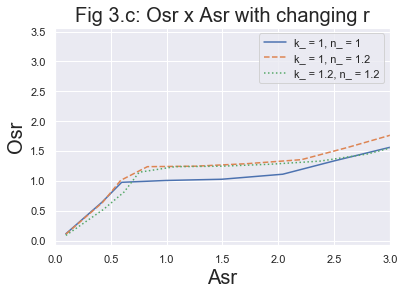

In [40]:
# Plot 3c

p1 = plt.plot(asr1, osr1)
p2 = plt.plot(asr2, osr2, linestyle = '--')
p3 = plt.plot(asr3, osr3, linestyle = ':')
plt.xlim(0,3)
plt.title('Fig 3.c: Osr x Asr with changing r', fontsize=20)
plt.xlabel('Asr', fontsize=20)
plt.ylabel('Osr', fontsize=20)
plt.legend((p1[0], p2[0], p3[0]), ('k_ = 1, n_ = 1', 'k_ = 1, n_ = 1.2', 'k_ = 1.2, n_ = 1.2'))
plt.savefig('3c.png')
plt.show()

In [41]:
# Figure 3cuu

#knob = [0.01,0.04,0.07,0.10,0.13,0.16,0.19,0.22,0.25,0.28,0.31,0.34]
knob = [0.0025,0.005,0.0075,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08]

asr1 = []
osr1 = []

asr2 = []
osr2 = []

asr3 = []
osr3 = []

#-----------------------------------------------------------------------------------------------------
# Continuous line

for u in knob:
    
    # Constant parameters:
    uo = 0.01
    ui = 0.01
    uo_ = u
    ui_ = u
    r = 1
    k = 1
    n = 1
    M = 1
    alpha = 0.1

    steps = 400

    # Moving parameters:
    k_ = 1
    n_ = 1
    gamma = 0.1
    
    parameters = [uo, ui, uo_, ui_, k, n, M, r, alpha, k_, n_, gamma]
    
    time, X, _ = Deterministic(steps, 0.01, parameters, [0.4,0.3])
    
    i = 0
    while True:
        if i >= len(X[0]):
            break
        if X[0][i] < 0 or X[1][i] < 0:
            X[0] = np.delete(X[0],np.s_[i:])
            X[1] = np.delete(X[1],np.s_[i:])
        i += 1
    
    T = X[0][-1]
    T_ = X[1][-1]
    
    A = n*r*(1-np.exp(-uo*T))*k/k_ - n_*(1-np.exp(-uo_*T_))
    ro = r*k*ui/(k_*ui_) + (M*M*A/(2*ui_*ui_))*(A+np.sqrt(A*A+4*ui*ui_*r*k/(M*M*k_))) # +- sqrt

    a = M*n*ro**(1/2)
    a_ = M*n_*ro**(-1/2)

    Li = 1/(a*(1-np.exp(-uo*T))+ui)
    Lo = a*(1+uo*T-np.exp(uo*T)*(1-uo*T))/((ui+a*(1-np.exp(uo*T)))*uo)

    Li_ = 1/(a*(1-np.exp(-uo_*T_))+ui_)
    Lo_ = a*(1+uo_*T_-np.exp(uo_*T_)*(1-uo_*T_))/((ui_+a*(1-np.exp(uo_*T_)))*uo_)

    ra = r*((Li_+Lo_)/k_ + (k_-1)/(k_*ui_))/((Li+Lo)/k + (k-1)/(k*ui))
    
    
    asr1.append(ra)
    osr1.append(ro)
    
asr1 = np.array(asr1)
osr1 = np.array(osr1)

#-----------------------------------------------------------------------------------------------------
# Dashed line

for u in knob:
    
    # Constant parameters:
    uo = 0.01
    ui = 0.01
    uo_ = u
    ui_ = u
    r = 1
    k = 1
    n = 1
    M = 1
    alpha = 0.1

    steps = 400

    # Moving parameters:
    k_ = 1
    n_ = 1.2
    gamma = 0.1
    
    parameters = [uo, ui, uo_, ui_, k, n, M, r, alpha, k_, n_, gamma]
    
    time, X, _ = Deterministic(steps, 0.01, parameters, [0.4,0.3])
    
    i = 0
    while True:
        if i >= len(X[0]):
            break
        if X[0][i] < 0 or X[1][i] < 0:
            X[0] = np.delete(X[0],np.s_[i:])
            X[1] = np.delete(X[1],np.s_[i:])
        i += 1
    
    T = X[0][-1]
    T_ = X[1][-1]
    
    A = n*r*(1-np.exp(-uo*T))*k/k_ - n_*(1-np.exp(-uo_*T_))
    ro = r*k*ui/(k_*ui_) + (M*M*A/(2*ui_*ui_))*(A+np.sqrt(A*A+4*ui*ui_*r*k/(M*M*k_))) # +- sqrt

    a = M*n*ro**(1/2)
    a_ = M*n_*ro**(-1/2)

    Li = 1/(a*(1-np.exp(-uo*T))+ui)
    Lo = a*(1+uo*T-np.exp(uo*T)*(1-uo*T))/((ui+a*(1-np.exp(uo*T)))*uo)

    Li_ = 1/(a*(1-np.exp(-uo_*T_))+ui_)
    Lo_ = a*(1+uo_*T_-np.exp(uo_*T_)*(1-uo_*T_))/((ui_+a*(1-np.exp(uo_*T_)))*uo_)

    ra = r*((Li_+Lo_)/k_ + (k_-1)/(k_*ui_))/((Li+Lo)/k + (k-1)/(k*ui))
    
    
    asr2.append(ra)
    osr2.append(ro)
    
asr2 = np.array(asr2)
osr2 = np.array(osr2)

#-----------------------------------------------------------------------------------------------------
# Dotted line

for u in knob:
    
    # Constant parameters:
    uo = 0.01
    ui = 0.01
    uo_ = u
    ui_ = u
    r = 1
    k = 1
    n = 1
    M = 1
    alpha = 0.1

    steps = 400

    # Moving parameters:
    k_ = 1.2
    n_ = 1.2
    gamma = 0.1
    
    parameters = [uo, ui, uo_, ui_, k, n, M, r, alpha, k_, n_, gamma]
    
    time, X, _ = Deterministic(steps, 0.01, parameters, [0.4,0.3])
    
    i = 0
    while True:
        if i >= len(X[0]):
            break
        if X[0][i] < 0 or X[1][i] < 0:
            X[0] = np.delete(X[0],np.s_[i:])
            X[1] = np.delete(X[1],np.s_[i:])
        i += 1
    
    T = X[0][-1]
    T_ = X[1][-1]
    
    A = n*r*(1-np.exp(-uo*T))*k/k_ - n_*(1-np.exp(-uo_*T_))
    ro = r*k*ui/(k_*ui_) + (M*M*A/(2*ui_*ui_))*(A+np.sqrt(A*A+4*ui*ui_*r*k/(M*M*k_))) # +- sqrt

    a = M*n*ro**(1/2)
    a_ = M*n_*ro**(-1/2)

    Li = 1/(a*(1-np.exp(-uo*T))+ui)
    Lo = a*(1+uo*T-np.exp(uo*T)*(1-uo*T))/((ui+a*(1-np.exp(uo*T)))*uo)

    Li_ = 1/(a*(1-np.exp(-uo_*T_))+ui_)
    Lo_ = a*(1+uo_*T_-np.exp(uo_*T_)*(1-uo_*T_))/((ui_+a*(1-np.exp(uo_*T_)))*uo_)

    ra = r*((Li_+Lo_)/k_ + (k_-1)/(k_*ui_))/((Li+Lo)/k + (k-1)/(k*ui))
    
    
    asr3.append(ra)
    osr3.append(ro)
    
asr3 = np.array(asr3)
osr3 = np.array(osr3)


/home/gui/anaconda3/envs/sage/lib/python3.7/site-packages/sage/repl/ipython_kernel/__main__.py:36: RuntimeWarning: overflow encountered in exp
/home/gui/anaconda3/envs/sage/lib/python3.7/site-packages/sage/repl/ipython_kernel/__main__.py:39: RuntimeWarning: invalid value encountered in double_scalars
/home/gui/anaconda3/envs/sage/lib/python3.7/site-packages/sage/repl/ipython_kernel/__main__.py:44: RuntimeWarning: overflow encountered in exp
/home/gui/anaconda3/envs/sage/lib/python3.7/site-packages/sage/repl/ipython_kernel/__main__.py:45: RuntimeWarning: invalid value encountered in double_scalars
/home/gui/anaconda3/envs/sage/lib/python3.7/site-packages/sage/repl/ipython_kernel/__main__.py:49: RuntimeWarning: invalid value encountered in double_scalars
/home/gui/anaconda3/envs/sage/lib/python3.7/site-packages/sage/repl/ipython_kernel/__main__.py:53: RuntimeWarning: overflow encountered in exp
/home/gui/anaconda3/envs/sage/lib/python3.7/site-packages/sage/repl/ipython_kernel/__main__.py

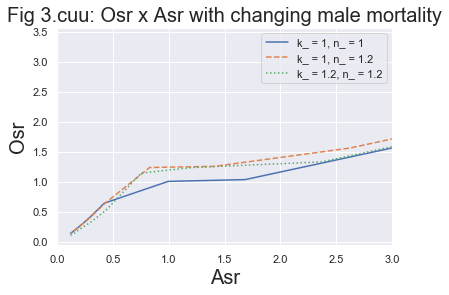

In [42]:
# Plot 3cuu

p1 = plt.plot(asr1, osr1)
p2 = plt.plot(asr2, osr2, linestyle = '--')
p3 = plt.plot(asr3, osr3, linestyle = ':')
plt.xlim(0,3)
plt.title('Fig 3.cuu: Osr x Asr with changing male mortality', fontsize=20)
plt.xlabel('Asr', fontsize=20)
plt.ylabel('Osr', fontsize=20)
plt.legend((p1[0], p2[0], p3[0]), ('k_ = 1, n_ = 1', 'k_ = 1, n_ = 1.2', 'k_ = 1.2, n_ = 1.2'))
plt.savefig('3cuu.png')
plt.show()

In [43]:
# Figure 3d

#knob = [0.01,0.04,0.07,0.10,0.13,0.16,0.19,0.22,0.25,0.28,0.31,0.34]
knob = [0.0025,0.005,0.0075,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08]

asr1 = []
osr1 = []

asr2 = []
osr2 = []

asr3 = []
osr3 = []

#-----------------------------------------------------------------------------------------------------
# Continuous line

for u in knob:
    
    # Constant parameters:
    uo = 0.01
    ui = 0.01
    uo_ = 0.01
    ui_ = u
    r = 1
    k = 1
    n = 1
    M = 1
    alpha = 0.1

    steps = 400

    # Moving parameters:
    k_ = 1
    n_ = 1
    gamma = 0.1
    
    parameters = [uo, ui, uo_, ui_, k, n, M, r, alpha, k_, n_, gamma]
    
    time, X, _ = Deterministic(steps, 0.01, parameters, [0.4,0.3])
    
    i = 0
    while True:
        if i >= len(X[0]):
            break
        if X[0][i] < 0 or X[1][i] < 0:
            X[0] = np.delete(X[0],np.s_[i:])
            X[1] = np.delete(X[1],np.s_[i:])
        i += 1
    
    T = X[0][-1]
    T_ = X[1][-1]
    
    A = n*r*(1-np.exp(-uo*T))*k/k_ - n_*(1-np.exp(-uo_*T_))
    ro = r*k*ui/(k_*ui_) + (M*M*A/(2*ui_*ui_))*(A+np.sqrt(A*A+4*ui*ui_*r*k/(M*M*k_))) # +- sqrt

    a = M*n*ro**(1/2)
    a_ = M*n_*ro**(-1/2)

    Li = 1/(a*(1-np.exp(-uo*T))+ui)
    Lo = a*(1+uo*T-np.exp(uo*T)*(1-uo*T))/((ui+a*(1-np.exp(uo*T)))*uo)

    Li_ = 1/(a*(1-np.exp(-uo_*T_))+ui_)
    Lo_ = a*(1+uo_*T_-np.exp(uo_*T_)*(1-uo_*T_))/((ui_+a*(1-np.exp(uo_*T_)))*uo_)

    ra = r*((Li_+Lo_)/k_ + (k_-1)/(k_*ui_))/((Li+Lo)/k + (k-1)/(k*ui))
    
    
    asr1.append(ra)
    osr1.append(ro)
    
asr1 = np.array(asr1)
osr1 = np.array(osr1)

#-----------------------------------------------------------------------------------------------------
# Dashed line

for u in knob:
    
    # Constant parameters:
    uo = 0.01
    ui = 0.01
    uo_ = 0.01
    ui_ = u
    r = 1
    k = 1
    n = 1
    M = 1
    alpha = 0.1

    steps = 400

    # Moving parameters:
    k_ = 1
    n_ = 1.2
    gamma = 0.1
    
    parameters = [uo, ui, uo_, ui_, k, n, M, r, alpha, k_, n_, gamma]
    
    time, X, _ = Deterministic(steps, 0.01, parameters, [0.4,0.3])
    
    i = 0
    while True:
        if i >= len(X[0]):
            break
        if X[0][i] < 0 or X[1][i] < 0:
            X[0] = np.delete(X[0],np.s_[i:])
            X[1] = np.delete(X[1],np.s_[i:])
        i += 1
    
    T = X[0][-1]
    T_ = X[1][-1]
    
    A = n*r*(1-np.exp(-uo*T))*k/k_ - n_*(1-np.exp(-uo_*T_))
    ro = r*k*ui/(k_*ui_) + (M*M*A/(2*ui_*ui_))*(A+np.sqrt(A*A+4*ui*ui_*r*k/(M*M*k_))) # +- sqrt

    a = M*n*ro**(1/2)
    a_ = M*n_*ro**(-1/2)

    Li = 1/(a*(1-np.exp(-uo*T))+ui)
    Lo = a*(1+uo*T-np.exp(uo*T)*(1-uo*T))/((ui+a*(1-np.exp(uo*T)))*uo)

    Li_ = 1/(a*(1-np.exp(-uo_*T_))+ui_)
    Lo_ = a*(1+uo_*T_-np.exp(uo_*T_)*(1-uo_*T_))/((ui_+a*(1-np.exp(uo_*T_)))*uo_)

    ra = r*((Li_+Lo_)/k_ + (k_-1)/(k_*ui_))/((Li+Lo)/k + (k-1)/(k*ui))
    
    
    asr2.append(ra)
    osr2.append(ro)
    
asr2 = np.array(asr2)
osr2 = np.array(osr2)

#-----------------------------------------------------------------------------------------------------
# Dotted line

for u in knob:
    
    # Constant parameters:
    uo = 0.01
    ui = 0.01
    uo_ = 0.01
    ui_ = u
    r = 1
    k = 1
    n = 1
    M = 1
    alpha = 0.1

    steps = 400

    # Moving parameters:
    k_ = 1.2
    n_ = 1.2
    gamma = 0.1
    
    parameters = [uo, ui, uo_, ui_, k, n, M, r, alpha, k_, n_, gamma]
    
    time, X, _ = Deterministic(steps, 0.01, parameters, [0.4,0.3])
    
    i = 0
    while True:
        if i >= len(X[0]):
            break
        if X[0][i] < 0 or X[1][i] < 0:
            X[0] = np.delete(X[0],np.s_[i:])
            X[1] = np.delete(X[1],np.s_[i:])
        i += 1
    
    T = X[0][-1]
    T_ = X[1][-1]
    
    A = n*r*(1-np.exp(-uo*T))*k/k_ - n_*(1-np.exp(-uo_*T_))
    ro = r*k*ui/(k_*ui_) + (M*M*A/(2*ui_*ui_))*(A+np.sqrt(A*A+4*ui*ui_*r*k/(M*M*k_))) # +- sqrt

    a = M*n*ro**(1/2)
    a_ = M*n_*ro**(-1/2)

    Li = 1/(a*(1-np.exp(-uo*T))+ui)
    Lo = a*(1+uo*T-np.exp(uo*T)*(1-uo*T))/((ui+a*(1-np.exp(uo*T)))*uo)

    Li_ = 1/(a*(1-np.exp(-uo_*T_))+ui_)
    Lo_ = a*(1+uo_*T_-np.exp(uo_*T_)*(1-uo_*T_))/((ui_+a*(1-np.exp(uo_*T_)))*uo_)

    ra = r*((Li_+Lo_)/k_ + (k_-1)/(k_*ui_))/((Li+Lo)/k + (k-1)/(k*ui))
    
    
    asr3.append(ra)
    osr3.append(ro)
    
asr3 = np.array(asr3)
osr3 = np.array(osr3)


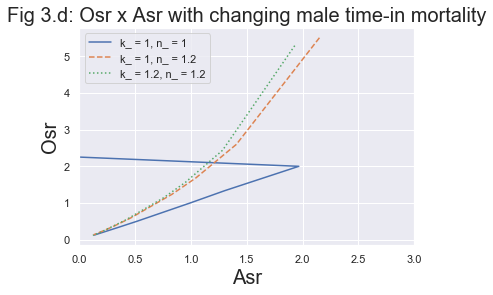

In [45]:
# Plot 3d

p1 = plt.plot(asr1, osr1)
p2 = plt.plot(asr2, osr2, linestyle = '--')
p3 = plt.plot(asr3, osr3, linestyle = ':')
plt.xlim(0,3)
plt.title('Fig 3.d: Osr x Asr with changing male time-in mortality', fontsize=20)
plt.xlabel('Asr', fontsize=20)
plt.ylabel('Osr', fontsize=20)
plt.legend((p1[0], p2[0], p3[0]), ('k_ = 1, n_ = 1', 'k_ = 1, n_ = 1.2', 'k_ = 1.2, n_ = 1.2'))
plt.savefig('3d.png')
plt.show()

In [ ]:
# Figure 4

#knob = [0.005,0.01,0.015,0.02,0.025,0.03,0.035,0.04]
#knob = [0.01,0.16,0.34]
knob = [0.0025,0.005,0.0075,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08]

asr1 = []
prop1 = []
male1 = []
female1 = []
osr1 = []

asr2 = []
prop2 = []
male2 = []
female2 = []
osr2 = []

asr3 = []
prop3 = []
male3 = []
female3 = []
osr3 = []

#-----------------------------------------------------------------------------------------------------
# Continuous line

for u in knob:
    
    # Constant parameters:
    uo = 0.01
    ui = u
    uo_ = 0.01
    ui_ = u
    r = 1
    k = 1
    n = 1
    M = 1
    alpha = 0.1

    steps = 400

    # Moving parameters:
    k_ = 1
    n_ = 1
    gamma = 0.1
    
    parameters = [uo, ui, uo_, ui_, k, n, M, r, alpha, k_, n_, gamma]
    
    time, X, _ = Deterministic(steps, 0.01, parameters, [0.4,0.3])
    
    i = 0
    while True:
        if i >= len(X[0]):
            break
        if X[0][i] < 0 or X[1][i] < 0:
            X[0] = np.delete(X[0],np.s_[i:])
            X[1] = np.delete(X[1],np.s_[i:])
        i += 1
    
    T = X[0][-1]
    T_ = X[1][-1]
    
    A = n*r*(1-np.exp(-uo*T))*k/k_ - n_*(1-np.exp(-uo_*T_))
    ro = r*k*ui/(k_*ui_) + (M*M*A/(2*ui_*ui_))*(A+np.sqrt(A*A+4*ui*ui_*r*k/(M*M*k_))) # +- sqrt

    a = M*n*ro**(1/2)
    a_ = M*n_*ro**(-1/2)

    Li = 1/(a*(1-np.exp(-uo*T))+ui)
    Lo = a*(1+uo*T-np.exp(uo*T)*(1-uo*T))/((ui+a*(1-np.exp(uo*T)))*uo)

    Li_ = 1/(a*(1-np.exp(-uo_*T_))+ui_)
    Lo_ = a*(1+uo_*T_-np.exp(uo_*T_)*(1-uo_*T_))/((ui_+a*(1-np.exp(uo_*T_)))*uo_)

    ra = r*((Li_+Lo_)/k_ + (k_-1)/(k_*ui_))/((Li+Lo)/k + (k-1)/(k*ui))
    
    pT_ = T_/(T+T_)
    
    asr1.append(ra)
    prop1.append(pT_)
    male1.append(T_)
    female1.append(T)
    osr1.append(ro)
    
asr1 = np.array(asr1)
prop1 = np.array(prop1)
male1 = np.array(male1)
female1 = np.array(female1)
osr1 = np.array(osr1)

#-----------------------------------------------------------------------------------------------------
# Dashed line

for u in knob:
    
    # Constant parameters:
    uo = 0.01
    ui = u
    uo_ = 0.01
    ui_ = u
    r = 1
    k = 1
    n = 1
    M = 1
    alpha = 0.1

    steps = 400

    # Moving parameters:
    k_ = 1
    n_ = 1.2
    gamma = 0.1
    
    parameters = [uo, ui, uo_, ui_, k, n, M, r, alpha, k_, n_, gamma]
    
    time, X, _ = Deterministic(steps, 0.01, parameters, [0.4,0.3])
    
    i = 0
    while True:
        if i >= len(X[0]):
            break
        if X[0][i] < 0 or X[1][i] < 0:
            X[0] = np.delete(X[0],np.s_[i:])
            X[1] = np.delete(X[1],np.s_[i:])
        i += 1
    
    T = X[0][-1]
    T_ = X[1][-1]
    
    A = n*r*(1-np.exp(-uo*T))*k/k_ - n_*(1-np.exp(-uo_*T_))
    ro = r*k*ui/(k_*ui_) + (M*M*A/(2*ui_*ui_))*(A+np.sqrt(A*A+4*ui*ui_*r*k/(M*M*k_))) # +- sqrt

    a = M*n*ro**(1/2)
    a_ = M*n_*ro**(-1/2)

    Li = 1/(a*(1-np.exp(-uo*T))+ui)
    Lo = a*(1+uo*T-np.exp(uo*T)*(1-uo*T))/((ui+a*(1-np.exp(uo*T)))*uo)

    Li_ = 1/(a*(1-np.exp(-uo_*T_))+ui_)
    Lo_ = a*(1+uo_*T_-np.exp(uo_*T_)*(1-uo_*T_))/((ui_+a*(1-np.exp(uo_*T_)))*uo_)

    ra = r*((Li_+Lo_)/k_ + (k_-1)/(k_*ui_))/((Li+Lo)/k + (k-1)/(k*ui))
    
    pT_ = T_/(T+T_)
    
    asr2.append(ra)
    prop2.append(pT_)
    male2.append(T_)
    female2.append(T)
    osr2.append(ro)
    
asr2 = np.array(asr2)
prop2 = np.array(prop2)
male2 = np.array(male2)
female2 = np.array(female2)
osr2 = np.array(osr2)

#-----------------------------------------------------------------------------------------------------
# Dotted line

for u in knob:
    
    # Constant parameters:
    uo = 0.01
    ui = u
    uo_ = 0.01
    ui_ = u
    r = 1
    k = 1
    n = 1
    M = 1
    alpha = 0.1

    steps = 400

    # Moving parameters:
    k_ = 1.2
    n_ = 1.2
    gamma = 0.1
    
    parameters = [uo, ui, uo_, ui_, k, n, M, r, alpha, k_, n_, gamma]
    
    time, X, _ = Deterministic(steps, 0.01, parameters, [0.4,0.3])
    
    i = 0
    while True:
        if i >= len(X[0]):
            break
        if X[0][i] < 0 or X[1][i] < 0:
            X[0] = np.delete(X[0],np.s_[i:])
            X[1] = np.delete(X[1],np.s_[i:])
        i += 1
    
    T = X[0][-1]
    T_ = X[1][-1]
    
    A = n*r*(1-np.exp(-uo*T))*k/k_ - n_*(1-np.exp(-uo_*T_))
    ro = r*k*ui/(k_*ui_) + (M*M*A/(2*ui_*ui_))*(A+np.sqrt(A*A+4*ui*ui_*r*k/(M*M*k_))) # +- sqrt

    a = M*n*ro**(1/2)
    a_ = M*n_*ro**(-1/2)

    Li = 1/(a*(1-np.exp(-uo*T))+ui)
    Lo = a*(1+uo*T-np.exp(uo*T)*(1-uo*T))/((ui+a*(1-np.exp(uo*T)))*uo)

    Li_ = 1/(a*(1-np.exp(-uo_*T_))+ui_)
    Lo_ = a*(1+uo_*T_-np.exp(uo_*T_)*(1-uo_*T_))/((ui_+a*(1-np.exp(uo_*T_)))*uo_)

    ra = r*((Li_+Lo_)/k_ + (k_-1)/(k_*ui_))/((Li+Lo)/k + (k-1)/(k*ui))
    
    pT_ = T_/(T+T_)
    
    asr3.append(ra)
    prop3.append(pT_)
    male3.append(T_)
    female3.append(T)
    osr3.append(osr3)
    
asr3 = np.array(asr3)
prop3 = np.array(prop3)
male3 = np.array(male3)
female3 = np.array(female3)
osr3 = np.array(osr3)

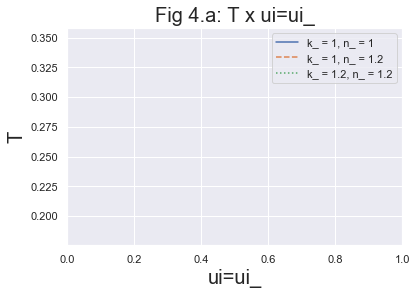

In [6]:
# Plot 4a

p1 = plt.plot(knob, female1)
p2 = plt.plot(knob, female2, linestyle = '--')
p3 = plt.plot(knob, female3, linestyle = ':')
plt.xlim(0,1)
plt.title('Fig 4.a: T x ui=ui_', fontsize=20)
plt.xlabel('ui=ui_', fontsize=20)
plt.ylabel('T', fontsize=20)
plt.legend((p1[0], p2[0], p3[0]), ('k_ = 1, n_ = 1', 'k_ = 1, n_ = 1.2', 'k_ = 1.2, n_ = 1.2'))
plt.savefig('4a.png')
plt.show()

In [ ]:
# Plot 4b

p1 = plt.plot(knob, prop1)
p2 = plt.plot(knob, prop2, linestyle = '--')
p3 = plt.plot(knob, prop3, linestyle = ':')
plt.xlim(0,1)
plt.title('Fig 4.b: Prop x ui=ui_', fontsize=20)
plt.xlabel('ui=ui_', fontsize=20)
plt.ylabel('Prop', fontsize=20)
plt.legend((p1[0], p2[0], p3[0]), ('k_ = 1, n_ = 1', 'k_ = 1, n_ = 1.2', 'k_ = 1.2, n_ = 1.2'))
plt.savefig('4b.png')
plt.show()

In [ ]:
# Plot 4c

p1 = plt.plot(knob, asr1)
p2 = plt.plot(knob, asr2, linestyle = '--')
p3 = plt.plot(knob, asr3, linestyle = ':')
plt.xlim(0,1)
plt.title('Fig 4.c: Asr x ui=ui_', fontsize=20)
plt.xlabel('ui=ui_', fontsize=20)
plt.ylabel('Asr', fontsize=20)
plt.legend((p1[0], p2[0], p3[0]), ('k_ = 1, n_ = 1', 'k_ = 1, n_ = 1.2', 'k_ = 1.2, n_ = 1.2'))
plt.savefig('4c.png')
plt.show()

In [ ]:
# Plot 4d

p1 = plt.plot(knob, osr1)
p2 = plt.plot(knob, osr2, linestyle = '--')
p3 = plt.plot(knob, osr3, linestyle = ':')
plt.xlim(0,1)
plt.title('Fig 4.d: Osr x ui=ui_', fontsize=20)
plt.xlabel('ui=ui_', fontsize=20)
plt.ylabel('Osr', fontsize=20)
plt.legend((p1[0], p2[0], p3[0]), ('k_ = 1, n_ = 1', 'k_ = 1, n_ = 1.2', 'k_ = 1.2, n_ = 1.2'))
plt.savefig('4d.png')
plt.show()